In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

## Exercise 3

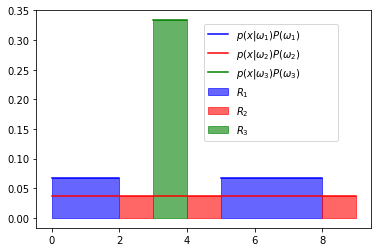

In [2]:
plt.plot(range(3),(1/15)*np.ones((3,1)),'b',label='$p(x|\omega_1)P(\omega_1)$')
plt.plot(range(5,9,1),(1/15)*np.ones((4,1)),'b')
plt.fill_between(range(3), 0, (1/15), color='b', alpha=0.6,label='$R_1$')
plt.fill_between(range(5,9), 0, (1/15), color='b', alpha=0.6)
plt.plot(range(10),(1/27)*np.ones((10,1)),'r',label='$p(x|\omega_2)P(\omega_2)$')
plt.fill_between(range(2,4), 0, (1/27), color='r', alpha=0.6,label='$R_2$')
plt.fill_between(range(4,6), 0, (1/27), color='r', alpha=0.6)
plt.fill_between(range(8,10), 0, (1/27), color='r', alpha=0.6)
plt.plot(range(3,5),(1/3)*np.ones((2,1)),'g',label='$p(x|\omega_3)P(\omega_3)$')
plt.fill_between(range(3,5), 0, 1/3, color='g', alpha=0.6,label='$R_3$')
plt.legend(bbox_to_anchor=(0.5, .4, .4, .102), loc=3,
ncol=1, mode="expand", borderaxespad=0.)
plt.show()

## Exercise 4

In [3]:
training_set = sio.loadmat('Training_set7.mat')
train_x = training_set['train_x']
train_y= training_set['train_y']

test_set = sio.loadmat('Test_set7.mat')
test_x = test_set['test_x']
test_y = test_set['test_y']

#### (i) Parametric approach

We find the probability of each class

In [4]:
p_w1 = np.sum(train_y==1)/ len(train_y)
p_w2 = np.sum(train_y==2)/ len(train_y)
p_w3 = np.sum(train_y==3)/ len(train_y)
p_w1, p_w2, p_w3

(0.5, 0.25, 0.25)

We find the data points of each class

In [5]:
index_w1 = np.where(train_y==1)[0];
index_w2 = np.where(train_y==2)[0];
index_w3 = np.where(train_y==3)[0];

In [6]:
train_x_w1 = train_x[index_w1]
train_x_w2 = train_x[index_w2]
train_x_w3 = train_x[index_w3]

Let visualize the 3 classes

In [7]:
np.linalg.eig(np.cov(train_x,rowvar=False))

(array([284.45775722,   6.08814099,   1.84029889,   1.77196267]),
 array([[ 0.57897208,  0.6000963 ,  0.46274223, -0.30090761],
        [ 0.59614204,  0.14969531, -0.67945267,  0.40068697],
        [ 0.35885807, -0.53262294, -0.23310451, -0.7302027 ],
        [ 0.42500221, -0.57774437,  0.5194959 ,  0.46444438]]))

From the covariance matrix eigenvalues, we see that only one dimension has the most variance.

In [8]:
pca2 = PCA(n_components = 2)
X_2d = pca2.fit_transform(train_x)

In [9]:
X_w1 = X_2d[index_w1]; X_w2 = X_2d[index_w2]; X_w3 = X_2d[index_w3]

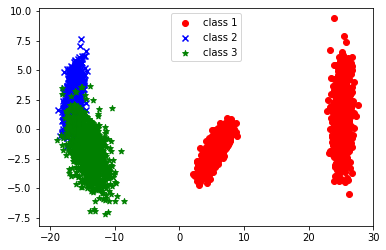

In [10]:
plt.scatter(X_w1[:,0],X_w1[:,1],c='r', marker='o',label='class 1')
plt.scatter(X_w2[:,0],X_w2[:,1],c='b', marker='x',label='class 2')
plt.scatter(X_w3[:,0],X_w3[:,1],c='g', marker='*',label='class 3')
plt.legend()
plt.show()

In [13]:
pca3 = PCA(n_components = 3)
X_3d = pca3.fit_transform(train_x)

In [14]:
X_w1 = X_3d[index_w1]; X_w2 = X_3d[index_w2]; X_w3 = X_3d[index_w3]

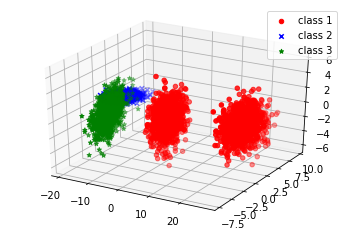

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_w1[:,0],X_w1[:,1],X_w1[:,2],c='r', marker='o',label='class 1')
ax.scatter(X_w2[:,0],X_w2[:,1],X_w2[:,2],c='b', marker='x',label='class 2')
ax.scatter(X_w3[:,0],X_w3[:,1],X_w3[:,2],c='g', marker='*',label='class 3')
plt.legend()
plt.show()

We can model the class w1 as a mixture of gaussians and the w2, w3 as gaussians.

In [16]:
gm = GaussianMixture(n_components=2)
p_x_w1 = gm.fit(train_x_w1)

In [17]:
p_x_w2 = multivariate_normal(np.mean(train_x_w2,axis=0),np.cov(train_x_w2,rowvar=False))
p_x_w3 = multivariate_normal(np.mean(train_x_w3,axis=0),np.cov(train_x_w3,rowvar=False))

Classify using the Bayes classifier and estimate the error classification probability

In [18]:
prob_w1 = np.exp(p_x_w1.score_samples(test_x))*p_w1
prob_w2 = p_x_w2.pdf(test_x)*p_w2
prob_w3 = p_x_w3.pdf(test_x)*p_w3

In [19]:
probs = np.vstack((prob_w1, prob_w2, prob_w3)).T
Btest_y = np.argmax(probs,axis=1) + 1

In [20]:
p_error = 1 - (np.sum(Btest_y[:,None]==test_y)/len(test_y)); p_error

0.01200000000000001

#### (ii) Non Parametric approach - kNN

In [21]:
from sklearn.neighbors.kde import KernelDensity
kde_w1 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(train_x_w1)
kde_w2 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(train_x_w2)
kde_w3 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(train_x_w3)

In [22]:
prob_w1 = kde_w1.score_samples(test_x)*p_w1
prob_w2 = kde_w2.score_samples(test_x)*p_w2
prob_w3 = kde_w3.score_samples(test_x)*p_w3

In [23]:
probs = np.vstack((prob_w1, prob_w2, prob_w3)).T
Btest_y_np = np.argmax(probs,axis=1) + 1

In [24]:
p_error_np = 1 - (np.sum(Btest_y_np[:,None]==test_y)/len(test_y)); p_error_np

0.01924999999999999